In [1]:
import pandas as pd
import numpy as np
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler    

In [3]:
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('data.csv',header=None, names=['v','omega','beta_l','beta_r','alpha'])

In [5]:
df

,v,omega,beta_l,beta_r,alpha
0,0.05,0.500,0.043644,0.130890,1.41740
1,0.05,0.333,0.038947,0.056502,0.71510
2,0.05,0.250,0.029736,0.043927,0.55261
3,0.05,0.200,0.025605,0.034113,0.44850
4,0.05,0.167,0.025462,0.028009,0.33650
...,...,...,...,...,...
105,0.30,0.857,0.093962,0.173780,0.29836
106,0.30,0.750,0.088420,0.145070,0.27585
107,0.30,0.667,0.076784,0.136060,0.21983
108,0.30,0.600,0.066786,0.126510,0.20565


In [6]:
x = df[['v','omega']].values

In [7]:
y = df[['beta_l','beta_r','alpha']].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, test_size=0.1)

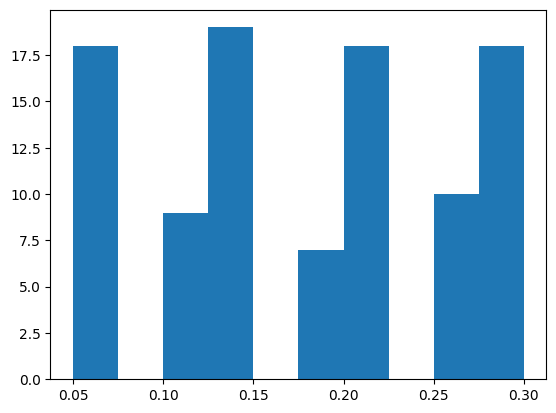

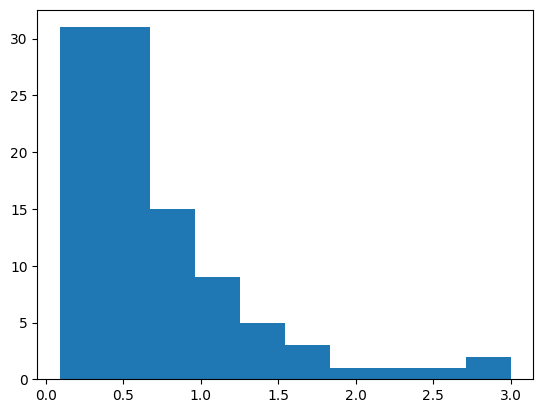

In [9]:
plt.figure()
plt.hist(x_train[...,0])
plt.figure()
plt.hist(x_train[...,1])
plt.show()

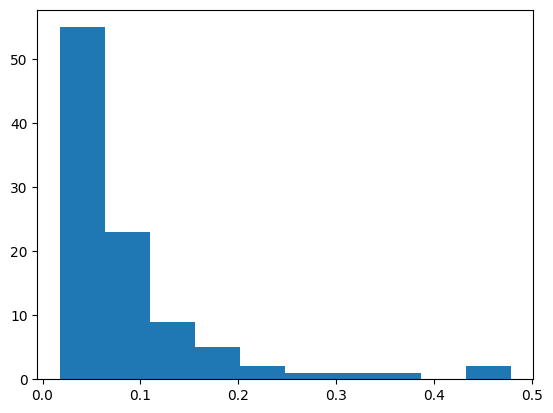

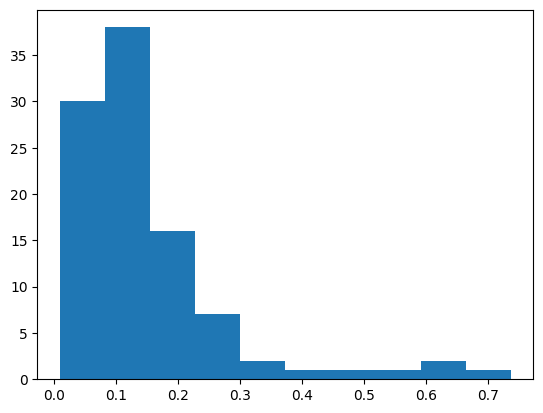

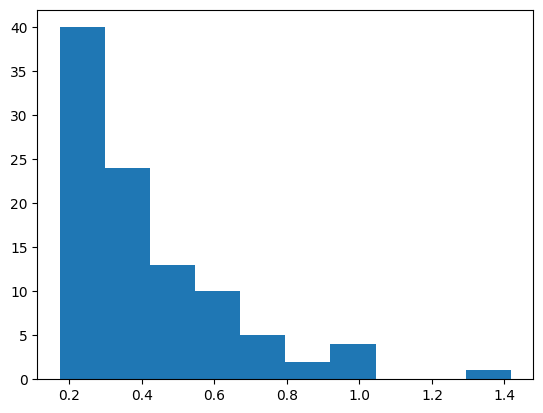

In [10]:
plt.figure()
plt.hist(y_train[...,0])
plt.figure()
plt.hist(y_train[...,1])
plt.figure()
plt.hist(y_train[...,2])
plt.show()

In [11]:
v_scaler = StandardScaler()
x_train[...,0] = v_scaler.fit_transform(x_train[...,0].reshape(-1,1)).flatten()
x_test[...,0] = v_scaler.transform(x_test[...,0].reshape(-1, 1)).flatten()

In [12]:
omega_scaler = StandardScaler()
x_train[...,1] = omega_scaler.fit_transform(x_train[...,1].reshape(-1,1)).flatten()
x_test[...,1] = omega_scaler.transform(x_test[...,1].reshape(-1, 1)).flatten()

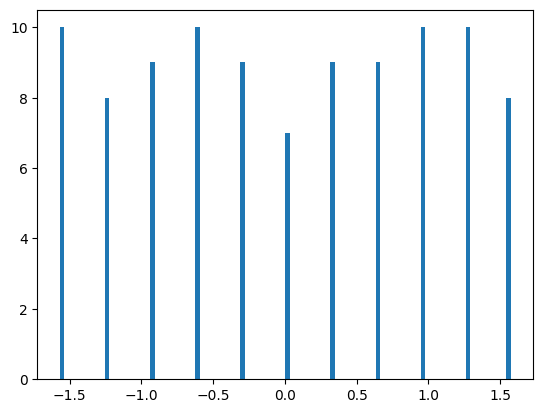

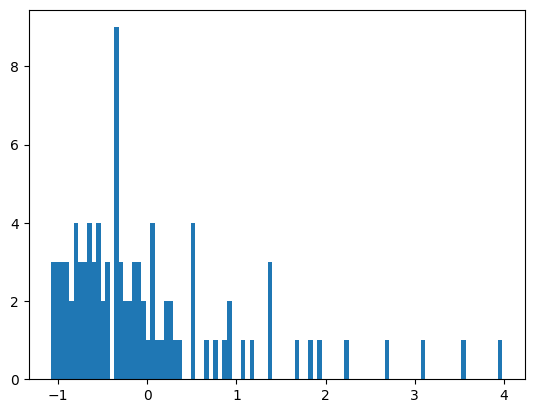

In [13]:
plt.figure()
plt.hist(x_train[...,0], bins=100)
plt.figure()
plt.hist(x_train[...,1], bins=100)
plt.show()

In [14]:
beta_l_scaler = StandardScaler()
y_train[...,0] = beta_l_scaler.fit_transform(y_train[...,0].reshape(-1,1)).flatten()
y_test[...,0] = beta_l_scaler.transform(y_test[...,0].reshape(-1, 1)).flatten()

In [15]:
beta_r_scaler = StandardScaler()
y_train[...,1] = beta_r_scaler.fit_transform(y_train[...,1].reshape(-1,1)).flatten()
y_test[...,1] = beta_r_scaler.transform(y_test[...,1].reshape(-1, 1)).flatten()

In [16]:
alpha_scaler = StandardScaler()
y_train[...,2] = alpha_scaler.fit_transform(y_train[...,2].reshape(-1,1)).flatten()
y_test[...,2] = alpha_scaler.transform(y_test[...,2].reshape(-1, 1)).flatten()

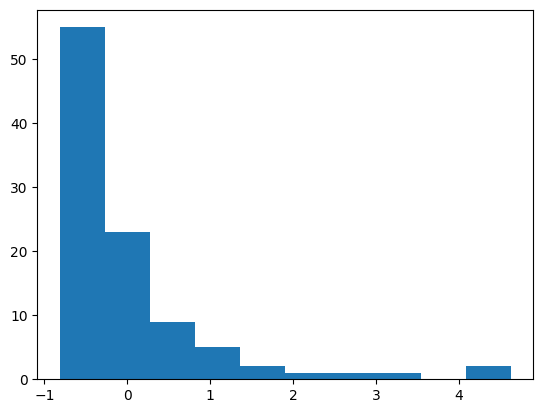

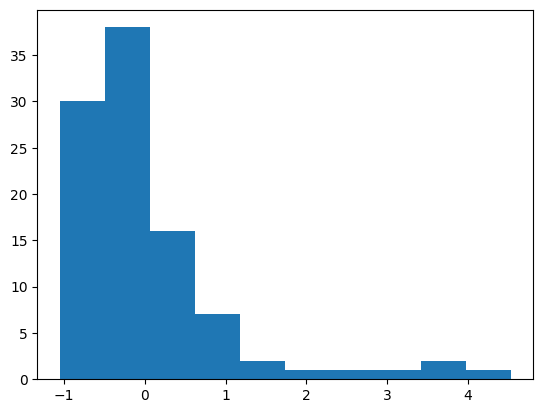

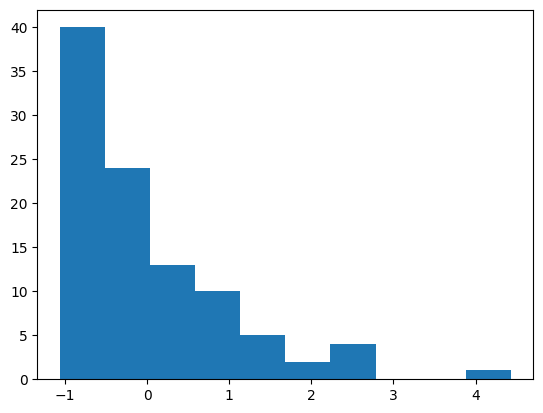

In [17]:
plt.figure()
plt.hist(y_train[...,0])
plt.figure()
plt.hist(y_train[...,1])
plt.figure()
plt.hist(y_train[...,2])
plt.show()

In [18]:
len(x_train),len(x_test)

(99, 11)

In [19]:
len(y_train),len(y_test)

(99, 11)

In [20]:
model = cb.CatBoostRegressor(loss_function='MultiRMSE',iterations=10000)

In [21]:
model.fit(x_train,y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7050921	total: 46ms	remaining: 7m 39s
1:	learn: 1.6765986	total: 46.3ms	remaining: 3m 51s
2:	learn: 1.6511244	total: 46.6ms	remaining: 2m 35s
3:	learn: 1.6236851	total: 46.9ms	remaining: 1m 57s
4:	learn: 1.5962321	total: 47.1ms	remaining: 1m 34s
5:	learn: 1.5727752	total: 47.5ms	remaining: 1m 19s
6:	learn: 1.5475485	total: 47.7ms	remaining: 1m 8s
7:	learn: 1.5297700	total: 47.8ms	remaining: 59.8s
8:	learn: 1.5086730	total: 48.1ms	remaining: 53.4s
9:	learn: 1.4850944	total: 48.3ms	remaining: 48.3s
10:	learn: 1.4613262	total: 48.6ms	remaining: 44.1s
11:	learn: 1.4399358	total: 48.8ms	remaining: 40.6s
12:	learn: 1.4298235	total: 48.8ms	remaining: 37.5s
13:	learn: 1.4084629	total: 49ms	remaining: 35s
14:	learn: 1.3891930	total: 49.2ms	remaining: 32.8s
15:	learn: 1.3720301	total: 49.5ms	remaining: 30.9s
16:	learn: 1.3518611	total: 49.7ms	remaining: 29.2s
17:	learn: 1.3385707	total: 49.9ms	remaining: 27.7s
18:	learn: 1.3185855	total: 50.2ms	remaining: 26.3s
19:	learn: 1.2985669	t

In [22]:
preds_train = model.predict(x_train)

In [23]:
preds = model.predict(x_test)

In [25]:
print(f'R2 metric train: {r2_score(y_train, preds_train)}')
print(f'R2 metric test: {r2_score(y_test, preds)}')

R2 metric train: 0.9999999150628723
R2 metric test: 0.8266054512204372


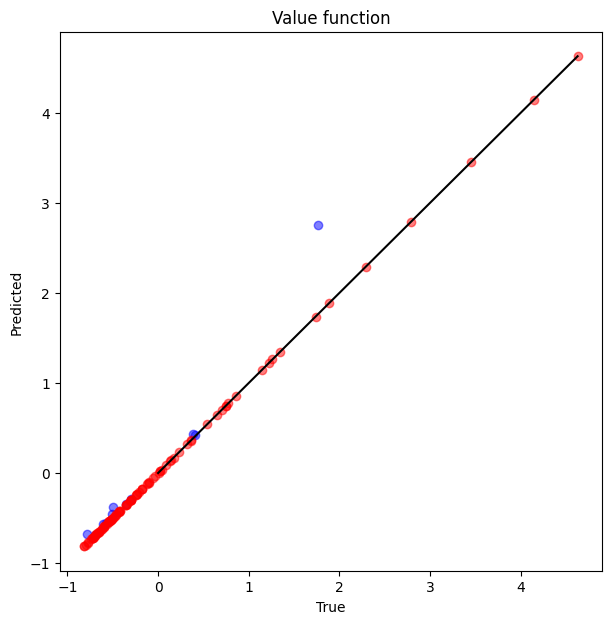

In [26]:
plt.figure(figsize=(7,7))
plt.title("Value function")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.scatter(y_test[...,0],preds[...,0], color="blue", alpha=0.5)
plt.scatter(y_train[...,0],preds_train[...,0], color="red", alpha=0.5)
plt.plot([0,y_train[...,0].max()],[0,y_train[...,0].max()], color="black")
plt.show()

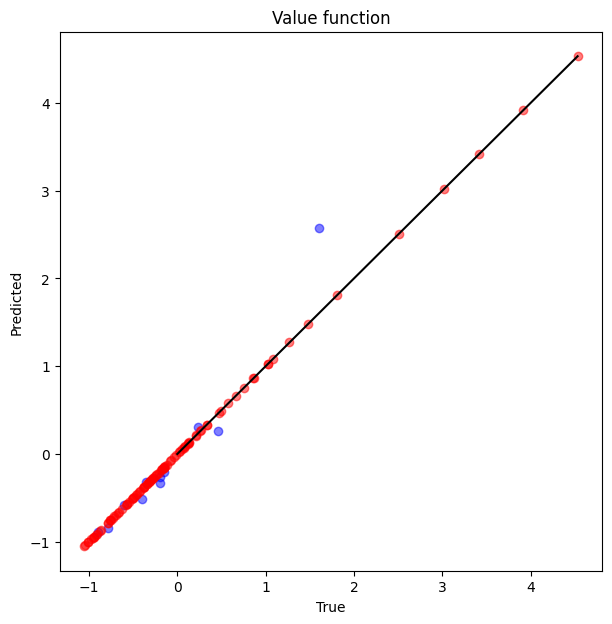

In [27]:
plt.figure(figsize=(7,7))
plt.title("Value function")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.scatter(y_test[...,1],preds[...,1], color="blue", alpha=0.5)
plt.scatter(y_train[...,1],preds_train[...,1], color="red", alpha=0.5)
plt.plot([0,y_train[...,1].max()],[0,y_train[...,1].max()], color="black")
plt.show()

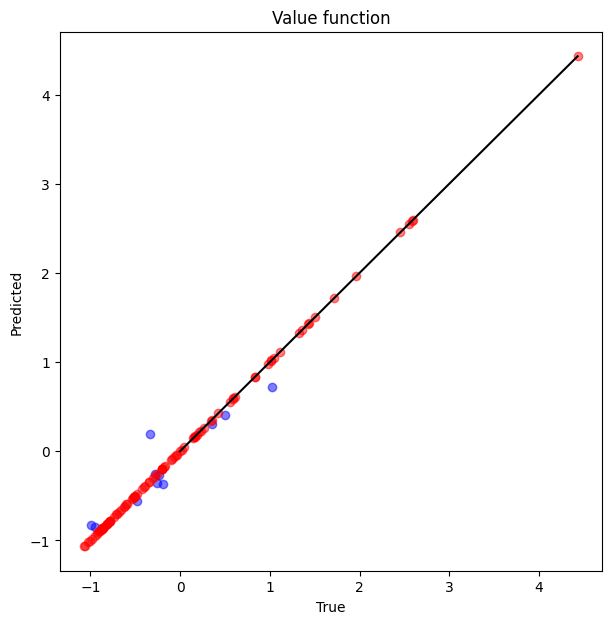

In [28]:
plt.figure(figsize=(7,7))
plt.title("Value function")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.scatter(y_test[...,2],preds[...,2], color="blue", alpha=0.5)
plt.scatter(y_train[...,2],preds_train[...,2], color="red", alpha=0.5)
plt.plot([0,y_train[...,2].max()],[0,y_train[...,2].max()], color="black")
plt.show()